In [1]:
import numpy as np
import dimod
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import VirtualGraphComposite

In [2]:
n = 3
N = n*n

R = np.random.random((n,2))
B = np.random.random((n,2))

D = np.empty((n,n))

for i in range(n):
    for j in range(n):
        D[i][j] = ( (R[i][0]-B[j][0])**2 + (R[i][1]-B[j][1])**2 )**(0.5)

print(D)
Q = {}
S = {}

[[0.24934843 0.9078493  0.96193228]
 [0.48053424 0.59908689 0.64916231]
 [0.47608477 0.43485897 0.47638392]]


In [3]:

lamba = 2
alpha = 2
print('Alpha: ' + str(alpha))
beta = 2

print('Beta: ' + str(beta))

for i in range(N):
    Q[(i,i)] = D[int(i/n)][i%n]- (alpha * lamba)

print('Q diagonal done.')

Alpha: 2
Beta: 2
Q diagonal done.


In [4]:

for i in range(N):
    for j in range(i+1,N):
        if int(i/n)==int(j/n) or i%n==j%n:
            Q[(i,j)] = beta * lamba
            S[(i,j)] = 1


In [5]:
from minorminer import find_embedding

sampler_wo_e = DWaveSampler(config_file='/home/manoj/.config/dwave/dwave.conf',profile='prod',)

A = sampler_wo_e.edgelist
AD = sampler_wo_e.adjacency
print(AD)

embeddings, valid = find_embedding(S, A, verbose=1, return_overlap=1)

print(embeddings)
print 'valid = ', valid

#from dimod import embed_qubo

#targetQ = embed_qubo(Q, embeddings, AD)


print sampler_wo_e.properties['extended_j_range']  

sampler = VirtualGraphComposite(sampler_wo_e, embeddings)

{0: set([128, 4, 5, 6, 7]), 1: set([129, 4, 5, 6, 7]), 2: set([130, 4, 5, 6, 7]), 3: set([131, 4, 5, 6, 7]), 4: set([0, 1, 2, 3, 12]), 5: set([0, 1, 2, 3, 13]), 6: set([0, 1, 2, 3, 14]), 7: set([0, 1, 2, 3, 15]), 8: set([136, 12, 13, 14, 15]), 9: set([137, 12, 13, 14, 15]), 10: set([138, 12, 13, 14, 15]), 11: set([139, 12, 13, 14, 15]), 12: set([4, 8, 9, 10, 11, 20]), 13: set([5, 8, 9, 10, 11, 21]), 14: set([6, 8, 9, 10, 11, 22]), 15: set([7, 8, 9, 10, 11, 23]), 16: set([144, 20, 21, 22, 23]), 17: set([145, 20, 21, 22, 23]), 18: set([146, 20, 21, 22, 23]), 19: set([147, 20, 21, 22, 23]), 20: set([12, 16, 17, 18, 19, 28]), 21: set([13, 16, 17, 18, 19, 29]), 22: set([14, 16, 17, 18, 19, 30]), 23: set([15, 16, 17, 18, 19, 31]), 24: set([152, 28, 29, 30, 31]), 25: set([153, 28, 29, 30, 31]), 26: set([154, 28, 29, 30, 31]), 27: set([155, 28, 29, 30, 31]), 28: set([36, 20, 24, 25, 26, 27]), 29: set([37, 21, 24, 25, 26, 27]), 30: set([38, 22, 24, 25, 26, 27]), 31: set([39, 23, 24, 25, 26, 27]

In [6]:
print(sampler_wo_e.properties['default_annealing_time'], sampler_wo_e.properties['annealing_time_range'])
print(sampler_wo_e.properties['default_readout_thermalization'],
      sampler_wo_e.properties['default_programming_thermalization'],
      sampler_wo_e.properties['programming_thermalization_range'])
print(sampler_wo_e.properties['num_reads_range'])

(20, [1, 2000])
(0, 1000, [0, 10000])
[1, 10000]


In [7]:
num_reads = 1000
annealing_time= 200
#programming_thermalization=sampler.properties['default_programming_thermalization']
#print programming_thermalization

response = sampler.sample_qubo(Q, num_reads=num_reads, annealing_time=annealing_time)
#                               programming_thermalization=programming_thermalization)

print "response:", response

response:     0  1  2  3  4  5  6  7  8      energy  num_occ.  chain_b.
0   0  0  1  1  0  0  0  1  0   -10.67304        11       0.0
1   0  0  1  0  1  0  1  0  0  -10.650513       810  0.111111
2   0  0  1  0  1  0  1  0  0  -10.650513         2       0.0
3   1  0  0  0  1  0  0  0  1  -10.248433         1       0.0
4   1  0  0  0  0  1  0  1  0  -10.243751       141       0.0
5   0  1  0  1  0  0  0  0  1  -10.030706        19       0.0
6   0  1  0  0  0  1  1  0  0  -10.003498         8       0.0
7   0  0  1  1  0  0  1  0  0    -6.56526         1  0.222222
8   1  0  0  0  0  1  1  1  0   -5.827282         3  0.111111
9   1  0  0  1  0  1  0  1  0   -5.801278         1  0.111111
10  0  0  1  0  1  0  1  0  1   -5.758169         1  0.222222
11  0  1  0  1  0  0  0  1  1   -5.722017         1  0.222222
12  1  0  0  0  0  1  0  1  1   -5.351407         1  0.111111

[ 13 rows, 9 variables ]


In [62]:
total_real_time = response.info['timing']['total_real_time']

timing = np.asarray(response.info['timing'].items())

print format(response)

    0  1  2  3  4  5  6  7  8      energy  num_occ.  chain_b.
0   0  0  1  1  0  0  0  1  0   -10.67304        11       0.0
1   0  0  1  0  1  0  1  0  0  -10.650513       810  0.111111
2   0  0  1  0  1  0  1  0  0  -10.650513         2       0.0
3   1  0  0  0  1  0  0  0  1  -10.248433         1       0.0
4   1  0  0  0  0  1  0  1  0  -10.243751       141       0.0
5   0  1  0  1  0  0  0  0  1  -10.030706        19       0.0
6   0  1  0  0  0  1  1  0  0  -10.003498         8       0.0
7   0  0  1  1  0  0  1  0  0    -6.56526         1  0.222222
8   1  0  0  0  0  1  1  1  0   -5.827282         3  0.111111
9   1  0  0  1  0  1  0  1  0   -5.801278         1  0.111111
10  0  0  1  0  1  0  1  0  1   -5.758169         1  0.222222
11  0  1  0  1  0  0  0  1  1   -5.722017         1  0.222222
12  1  0  0  0  0  1  0  1  1   -5.351407         1  0.111111

[ 13 rows, 9 variables ]


In [88]:
config_tmp = None
energy = []
freq = []

for sample in response.samples():
    x = np.asarray(sample.values())
    if config_tmp is None:
        config_tmp = x
    else:
        config_tmp = np.vstack([config_tmp, x])
    print format(sample)

    
for smp in response.data(fields=['energy', 'num_occurrences']):
    print smp.energy
    print smp.num_occurrences
    energy = np.append(energy, smp.energy)
    freq = np.append(freq, smp.num_occurrences)

print config_tmp

configs = config_tmp.astype(bool)

print configs
print energy
print freq

    
configs = np.asarray([ c.reshape(-1, n) for c in configs])

#energy = response.data_vectors['energy']
#freq = response.data_vectors['num_occurrences']

idx = np.argsort(-freq)

configs = configs[idx]
energy = energy[idx]
freq = freq[idx]

configs = [np.array(a).reshape(-1, n) for a in configs]

to_del = []

for c in range(len(configs)):
    row_sum = configs[c].sum(axis=0)
    col_sum = configs[c].sum(axis=1)
    if ( not (np.array_equal(row_sum,np.ones(n, dtype = int)))):
        to_del = np.append(to_del, int(c))
    else:
        if ( not (np.array_equal(col_sum,np.ones(n, dtype = int)))):
            to_del = np.append(to_del, int(c))
            
print format(to_del)

configs = np.delete(configs, to_del, axis=0)
energy = np.delete(energy, to_del)
freq = np.delete(freq, to_del)

print(configs)
print(energy)
print(freq)

{0: 0, 1: 0, 2: 1, 3: 1, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0}
{0: 0, 1: 0, 2: 1, 3: 0, 4: 1, 5: 0, 6: 1, 7: 0, 8: 0}
{0: 0, 1: 0, 2: 1, 3: 0, 4: 1, 5: 0, 6: 1, 7: 0, 8: 0}
{0: 1, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 1}
{0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 1, 8: 0}
{0: 0, 1: 1, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1}
{0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1, 7: 0, 8: 0}
{0: 0, 1: 0, 2: 1, 3: 1, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0}
{0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1, 7: 1, 8: 0}
{0: 1, 1: 0, 2: 0, 3: 1, 4: 0, 5: 1, 6: 0, 7: 1, 8: 0}
{0: 0, 1: 0, 2: 1, 3: 0, 4: 1, 5: 0, 6: 1, 7: 0, 8: 1}
{0: 0, 1: 1, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 1, 8: 1}
{0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 1, 8: 1}
-10.67303985366284
11
-10.65051347095327
810
-10.65051347095327
2
-10.248433145502151
1
-10.243751206902228
141
-10.030706158623161
19
-10.00349783731367
8
-6.565260194872167
1
-5.827282353664806
3
-5.801277888506151
1
-5.758168877439768
1
-5.722016964176412
1
-5.3514066133887255
1
[[

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:55: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:57: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


In [89]:
cost=np.zeros(len(configs))

for c in range(len(configs)):
    for i in range(n):
        for j in range(n):
            if (configs[c])[i][j] == 1:
                cost[c] += D[i][j]

print(cost)

[1.34948653 1.75624879 1.96929384 1.32696015 1.99650216 1.34948653
 1.75156685]


[[False False  True]
 [ True False False]
 [False  True False]]
1.3269601463371619
('Found a valid min cost result at index ', 3)
('The count of min cost in valid results is ', 1)
('The frequency of min cost in valid results is ', 11.0)


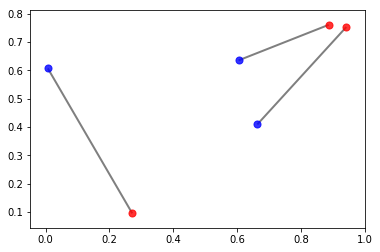

In [93]:
#Brute Force Minimum Check
import itertools as it
import math

f_n = math.factorial(n)

P=np.empty((f_n,n))
    
for i,j in enumerate(it.permutations(range(n))):
    P[i] = j

min_cost = 100

for item in P:
    perm_cost = 0
    for j in range(n):
        perm_cost += D[j][ int(item[j]) ]
    
    if perm_cost < min_cost:
        min_cost = perm_cost
        min_cost_config = item

min_config = np.zeros((n,n), dtype=bool)

for i in range(n):
    min_config[i][ int(min_cost_config[i]) ]=1
    
print(min_config)
print(min_cost)

min_count_cost = 0
min_frequency_count = 0

for c in range(len(configs)):
    if (cost[c] == min_cost): 
        min_count_cost += 1
        min_frequency_count += freq[c]
        print("Found a valid min cost result at index ", c)

print("The count of min cost in valid results is ", min_count_cost)
print("The frequency of min cost in valid results is ", min_frequency_count)

import networkx as nx
import matplotlib.pyplot as plt

G=nx.empty_graph()

nx.draw_networkx_nodes(G,pos=np.concatenate((R,B)),nodelist=range(n),node_color='r',node_size=50,alpha=0.8)
nx.draw_networkx_nodes(G,pos=np.concatenate((R,B)),nodelist=range(n,2*n),node_color='b',node_size=50,alpha=0.8)

E = []

for i in range(n):
    for j in range(n):
        if min_config[i][j]==1:
            E.append((i,n+j))

nx.draw_networkx_edges(G,pos=np.concatenate((R,B)),edgelist=E,width=2,alpha=0.5,edge_color='k')

plt.show()

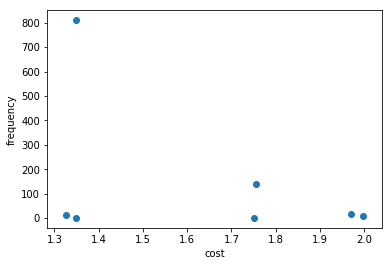

<Figure size 720x720 with 0 Axes>

In [94]:
plt.scatter(cost, freq)
plt.xlabel('cost')
plt.ylabel('frequency')

plt.figure(figsize=(10,10), facecolor='w', edgecolor='w')
plt.show()



Rows and Columns:  3 x 3 





NameError: name 'programming_thermalization' is not defined

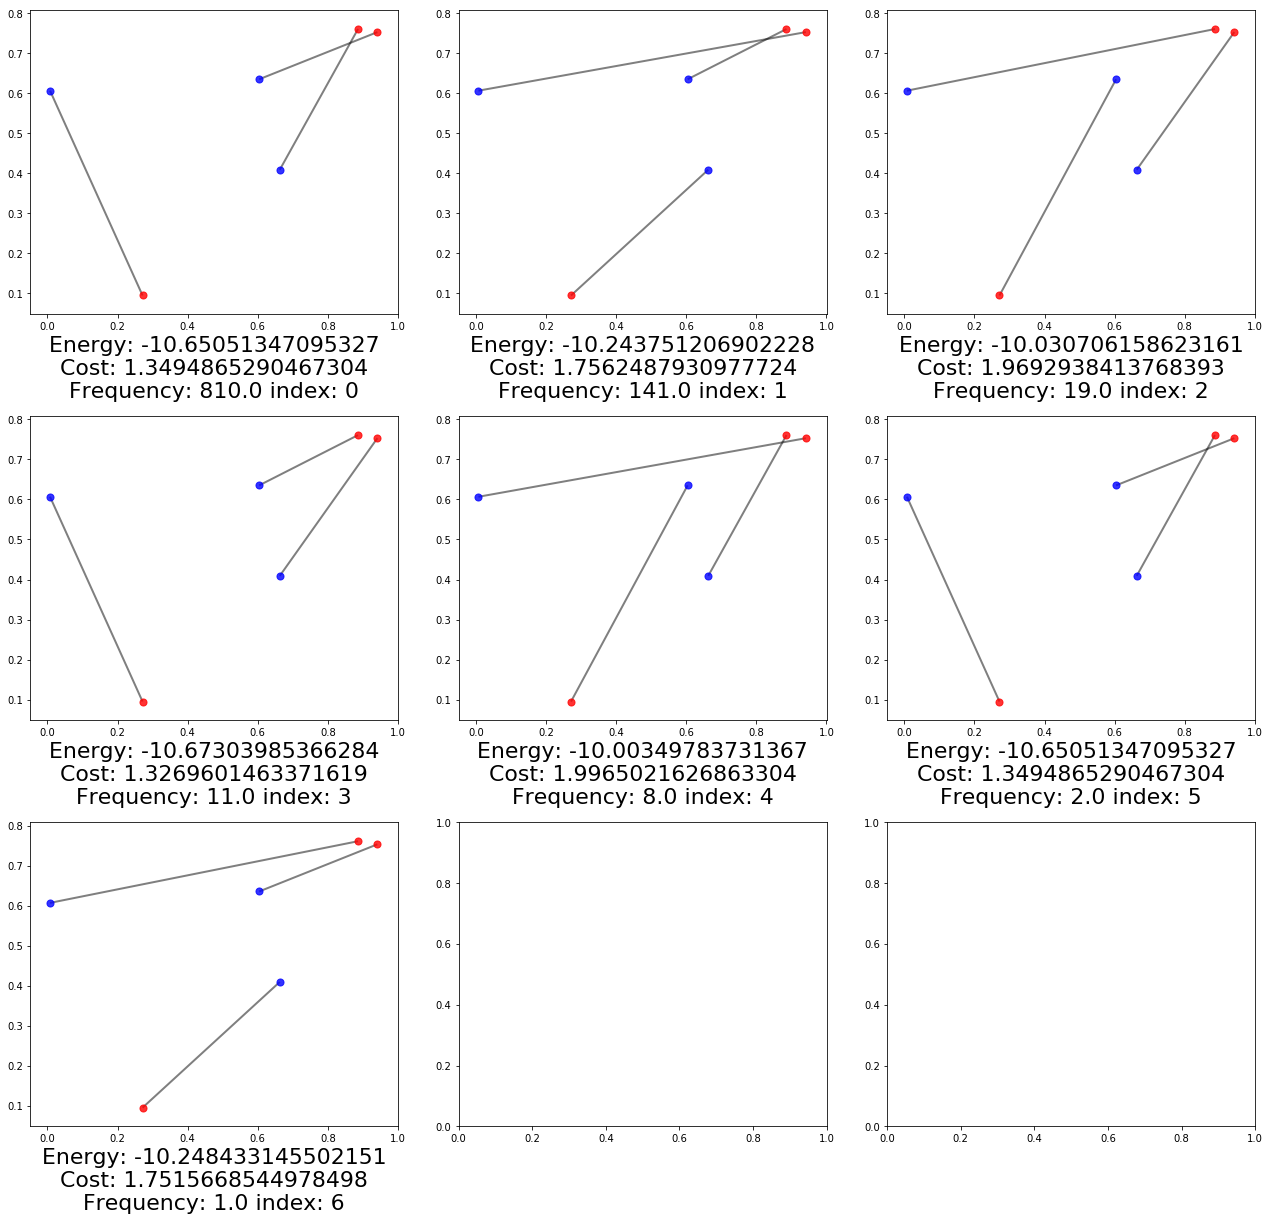

In [95]:
import networkx as nx

n_configs = len(configs)
n_cols = 3
n_rows = int(np.ceil(float(n_configs)/n_cols))

print '\nRows and Columns: ', n_rows, 'x', n_cols, '\n\n\n'
f, axarr = plt.subplots(n_rows, n_cols, figsize=(6*n_cols,6*n_rows), squeeze=False)

f.patch.set_facecolor('white')

for i in range(n_rows):
    for j in range(n_cols):
        k = i*n_cols+j
        if k<n_configs:
            axarr[i][j].set_xlabel('Energy: ' + str(energy[k]) + '\nCost: ' + str(cost[k])
                               + '\nFrequency: ' + str(freq[k]) + ' index: ' + str(k), fontsize=22 )
            
        #axarr[i][j].set_aspect(aspect=1, adjustable='box')

G=nx.empty_graph()

for c in range(n_configs):
       
    nx.draw_networkx_nodes(G,pos=np.concatenate((R,B)),nodelist=range(n),node_color='r',node_size=50,alpha=0.8, ax=axarr[c/n_cols,c%n_cols])
    nx.draw_networkx_nodes(G,pos=np.concatenate((R,B)),nodelist=range(n,2*n),node_color='b',node_size=50,alpha=0.8, ax=axarr[c/n_cols,c%n_cols])

    E = []

    for i in range(n):
        for j in range(n):
            if configs[c][i][j]==1:
                E.append((i,n+j))

    nx.draw_networkx_edges(G,pos=np.concatenate((R,B)),edgelist=E,width=2,alpha=0.5,edge_color='k', ax=axarr[c/n_cols,c%n_cols])
    
f.tight_layout(rect=[0, 0.03, 1, 0.978])
plt.suptitle('alpha: '+str(alpha)+', beta: '+str(beta)+', num_reads: '+str(num_reads)+
             ', annealing_time: '+str(annealing_time)+
             '\nprogramming_thermalization: '+str(programming_thermalization)+
             ', n_configs: '+str(n_configs)+', total_real_time: '+str(total_real_time), verticalalignment='baseline', fontsize=24)
plt.show()

In [29]:
np.savez('outputs/'+str(n)+'_dwave_ocean', R=R, B=B, alpha=alpha, beta=beta, num_reads=num_reads,
         annealing_time=annealing_time, programming_thermalization=programming_thermalization,
        configs=configs, energy=energy, freq=freq, timing=timing)